In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv('Updated_Sales_Dataset.csv')

In [67]:
# Create age groups in intervals of 10 years
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)

In [69]:
data.head()

,Transaction ID,Customer ID,Product ID,Transaction Date,Purchase Hour,Quantity,Price,Discounts,Payment Method,Product Category,...,Shipping Cost,Promotion Used,Customer Log Type,Product Description,Profit,Priority Order,Sales,Weekend or Weekday,Month,Age Group
0,7965,1091,103,2023-01-01,12,4,349.59,0.20,E-wallet,Fashion,...,10.24,Yes,Guest,Watch,132.253148,Medium,1173.494904,Weekend,1,30-39
1,8617,1034,126,2023-01-01,15,2,264.19,0.08,Credit Card,Electronics,...,16.95,Yes,Member,Camera,161.452391,Low,571.864043,Weekend,1,50-59
2,8777,1001,115,2023-01-01,19,3,468.64,0.20,E-wallet,Electronics,...,19.31,No,Member,Smartphone,349.041252,Medium,1319.092580,Weekend,1,20-29
3,1716,1014,125,2023-01-01,12,8,231.71,0.01,Cash,Electronics,...,6.60,Yes,Member,Camera,548.295176,Low,2802.872258,Weekend,1,40-49
4,3164,1010,103,2023-01-01,1,7,17.26,0.16,E-wallet,Home & Garden,...,13.83,Yes,Member,Chair,22.624874,High,144.227514,Weekend,1,50-59


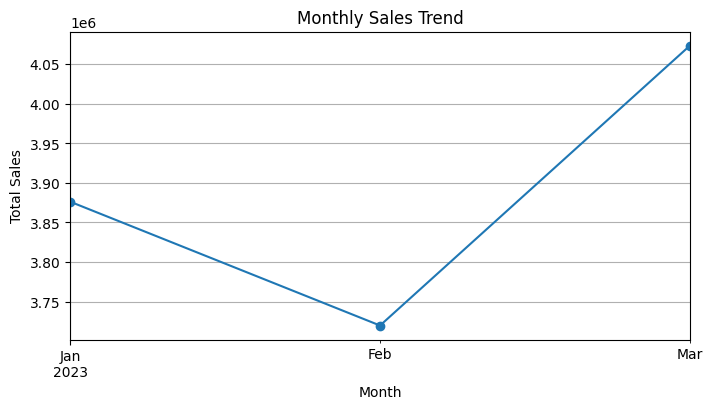

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'Transaction Date' column is in datetime format
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Group by month and sum only numeric columns
monthly_sales = data.groupby(data['Transaction Date'].dt.to_period('M')).sum(numeric_only=True)['Sales']

# Plot the monthly sales trend
plt.figure(figsize=(8, 4))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

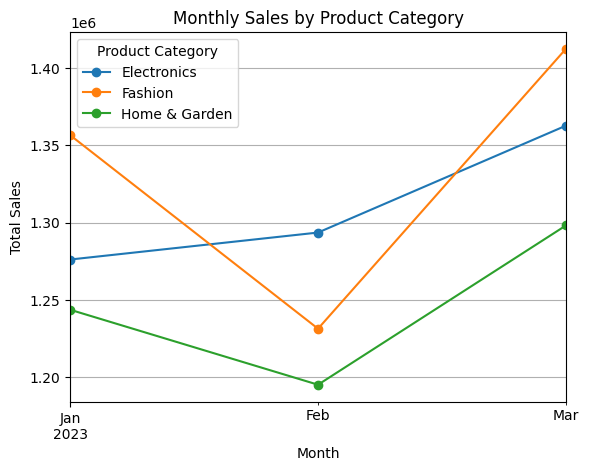

In [71]:
# Group by month and product category, then sum the sales
monthly_category_sales = data.groupby([data['Transaction Date'].dt.to_period('M'), 'Product Category']).sum(numeric_only=True)['Sales'].unstack()

# Plot the monthly sales by product category
plt.figure(figsize=(12, 6))
monthly_category_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend(title='Product Category')
plt.show()


In [ ]:
# Major Drop in Sales in February

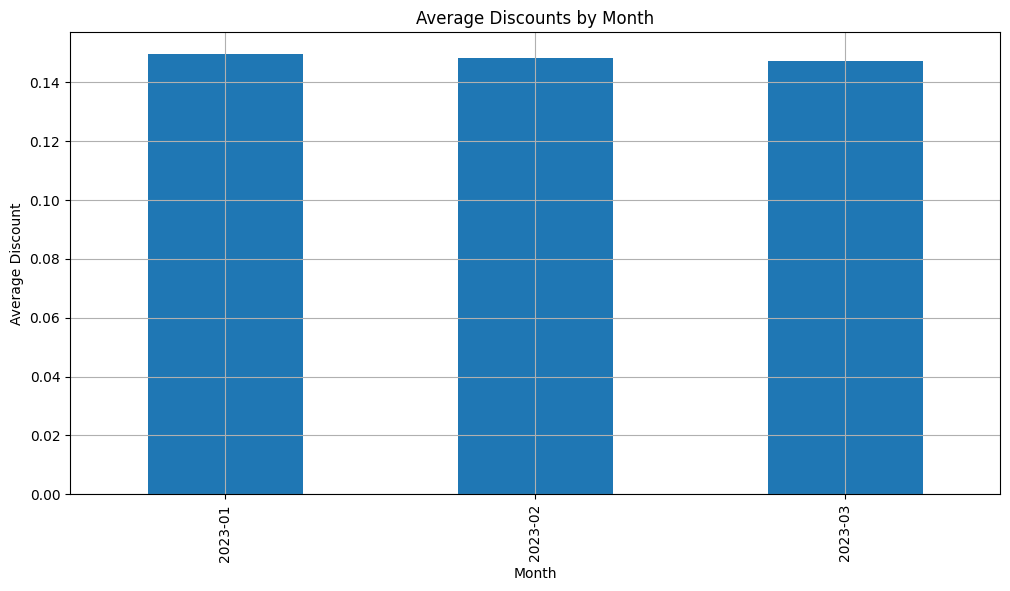

In [72]:
# Calculate average discount rates by month
monthly_discounts = data.groupby(data['Transaction Date'].dt.to_period('M')).mean(numeric_only=True)['Discounts']

# Plot the monthly average discounts
plt.figure(figsize=(12, 6))
monthly_discounts.plot(kind='bar')
plt.title('Average Discounts by Month')
plt.xlabel('Month')
plt.ylabel('Average Discount')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

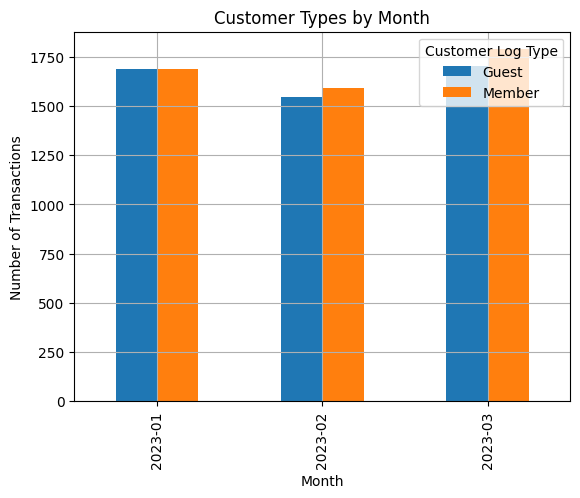

In [73]:
# Count the number of transactions by customer type and month
monthly_customer_type = data.groupby([data['Transaction Date'].dt.to_period('M'), 'Customer Log Type']).size().unstack()

# Plot the distribution of customer types by month
plt.figure(figsize=(12, 6))
monthly_customer_type.plot(kind='bar')
plt.title('Customer Types by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.legend(title='Customer Log Type')
plt.show()


<Figure size 1200x600 with 0 Axes>

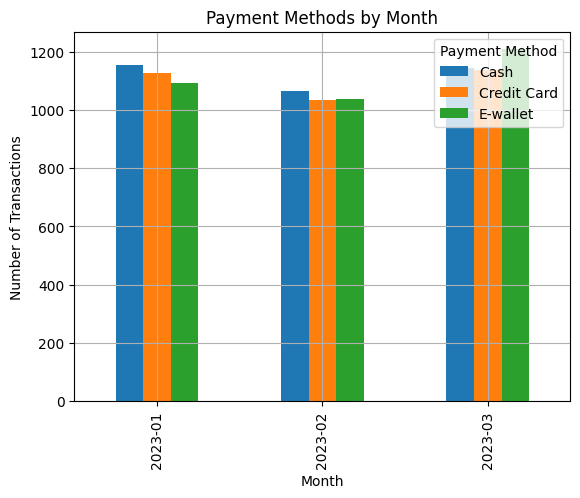

In [74]:
# Count the number of transactions by payment method and month
monthly_payment_methods = data.groupby([data['Transaction Date'].dt.to_period('M'), 'Payment Method']).size().unstack()

# Plot the distribution of payment methods by month
plt.figure(figsize=(12, 6))
monthly_payment_methods.plot(kind='bar')
plt.title('Payment Methods by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.legend(title='Payment Method')
plt.show()


<Figure size 1200x600 with 0 Axes>

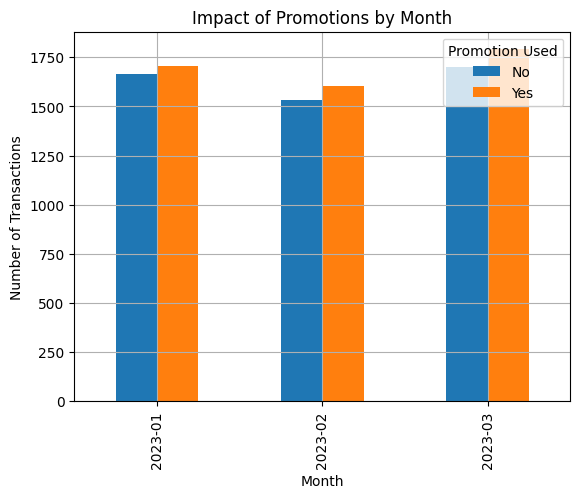

In [75]:
# Calculate the number of transactions with and without promotions by month
monthly_promotions = data.groupby([data['Transaction Date'].dt.to_period('M'), 'Promotion Used']).size().unstack()

# Plot the impact of promotions by month
plt.figure(figsize=(12, 6))
monthly_promotions.plot(kind='bar')
plt.title('Impact of Promotions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.legend(title='Promotion Used')
plt.show()


In [76]:
fashion_data = data[data['Product Category']=='Fashion']

In [77]:
fashion_data.head()

,Transaction ID,Customer ID,Product ID,Transaction Date,Purchase Hour,Quantity,Price,Discounts,Payment Method,Product Category,...,Shipping Cost,Promotion Used,Customer Log Type,Product Description,Profit,Priority Order,Sales,Weekend or Weekday,Month,Age Group
0,7965,1091,103,2023-01-01,12,4,349.59,0.20,E-wallet,Fashion,...,10.24,Yes,Guest,Watch,132.253148,Medium,1173.494904,Weekend,1,30-39
7,6837,1099,142,2023-01-01,9,8,106.77,0.15,E-wallet,Fashion,...,18.16,Yes,Member,Sneakers,274.295315,Medium,1112.037670,Weekend,1,50-59
9,3119,1003,176,2023-01-01,15,5,150.75,0.16,Credit Card,Fashion,...,13.99,No,Member,T-shirt,80.727503,Low,702.825788,Weekend,1,20-29
11,7157,1043,172,2023-01-01,11,8,139.42,0.00,Credit Card,Fashion,...,10.18,No,Member,Dress,268.092389,Medium,1578.169669,Weekend,1,40-49
21,4197,1066,170,2023-01-01,18,4,224.32,0.11,Cash,Fashion,...,16.72,No,Member,Sneakers,202.470876,Medium,1036.880178,Weekend,1,50-59


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x600 with 0 Axes>

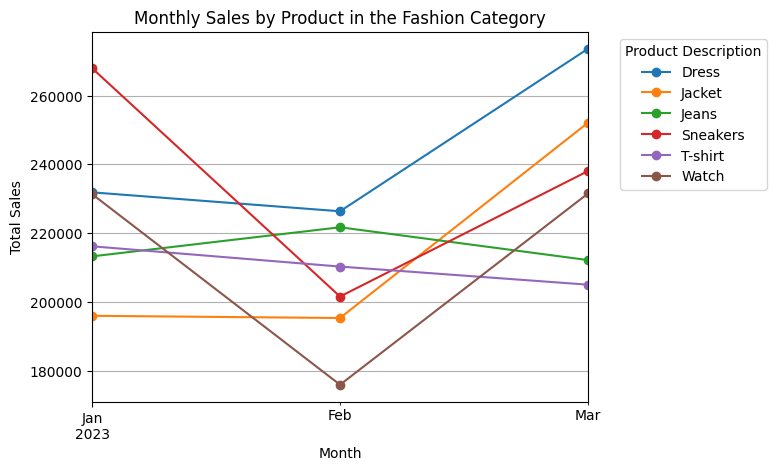

In [78]:
monthly_fashion_product_sales = fashion_data.groupby([fashion_data['Transaction Date'].dt.to_period('M'), 'Product Description']).sum(numeric_only=True)['Sales'].unstack()
plt.figure(figsize=(12,6))
monthly_fashion_product_sales.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales by Product in the Fashion Category')
plt.grid(True)
plt.legend(title='Product Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show

In [ ]:
# Watches and Sneakers have major DROP in Sales

<Figure size 1200x600 with 0 Axes>

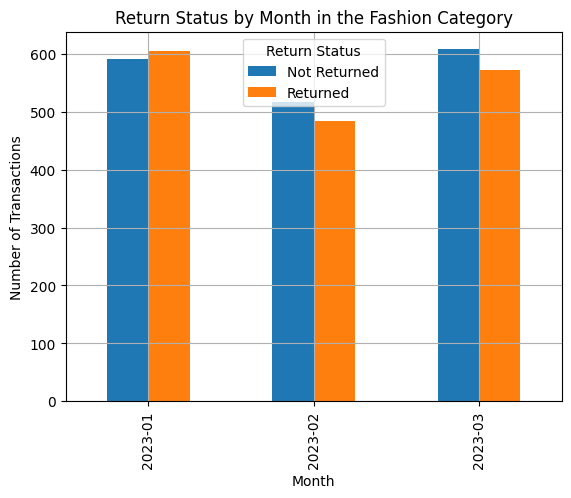

In [79]:
# Group by month and return status for the fashion category
monthly_fashion_returns = fashion_data.groupby([fashion_data['Transaction Date'].dt.to_period('M'), 'Return Status']).size().unstack()

# Plot the return status by month for the fashion category
plt.figure(figsize=(12, 6))
monthly_fashion_returns.plot(kind='bar')
plt.title('Return Status by Month in the Fashion Category')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.legend(title='Return Status')
plt.show()


<Figure size 1200x600 with 0 Axes>

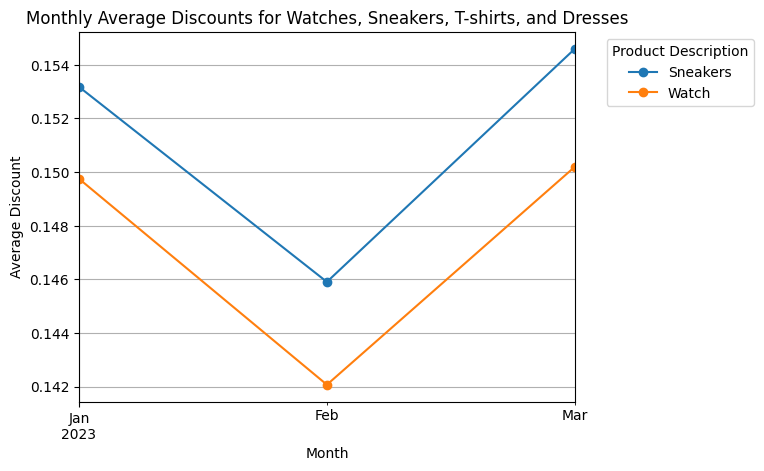

In [80]:
specific_products = ['Watch', 'Sneakers']
specific_product_data = fashion_data[fashion_data['Product Description'].isin(specific_products)]

# Calculate average discounts by month for specific products
monthly_specific_product_discounts = specific_product_data.groupby([specific_product_data['Transaction Date'].dt.to_period('M'), 'Product Description']).mean(numeric_only=True)['Discounts'].unstack()

# Plot the monthly average discounts for specific products
plt.figure(figsize=(12, 6))
monthly_specific_product_discounts.plot(kind='line', marker='o')
plt.title('Monthly Average Discounts for Watches, Sneakers, T-shirts, and Dresses')
plt.xlabel('Month')
plt.ylabel('Average Discount')
plt.grid(True)
plt.legend(title='Product Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Potential Reason: Major drop in discounts on Watches and Sneakers in February

<Figure size 1200x600 with 0 Axes>

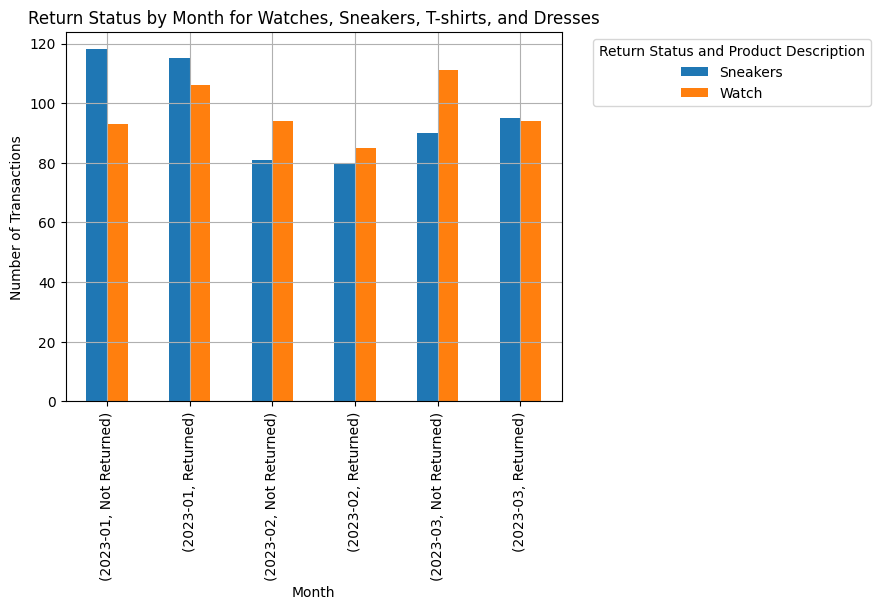

In [81]:
# Group by month and return status for specific products
monthly_specific_product_returns = specific_product_data.groupby([specific_product_data['Transaction Date'].dt.to_period('M'), 'Return Status', 'Product Description']).size().unstack()

# Plot the return status by month for specific products
plt.figure(figsize=(12, 6))
monthly_specific_product_returns.plot(kind='bar')
plt.title('Return Status by Month for Watches, Sneakers, T-shirts, and Dresses')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.legend(title='Return Status and Product Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 1200x600 with 0 Axes>

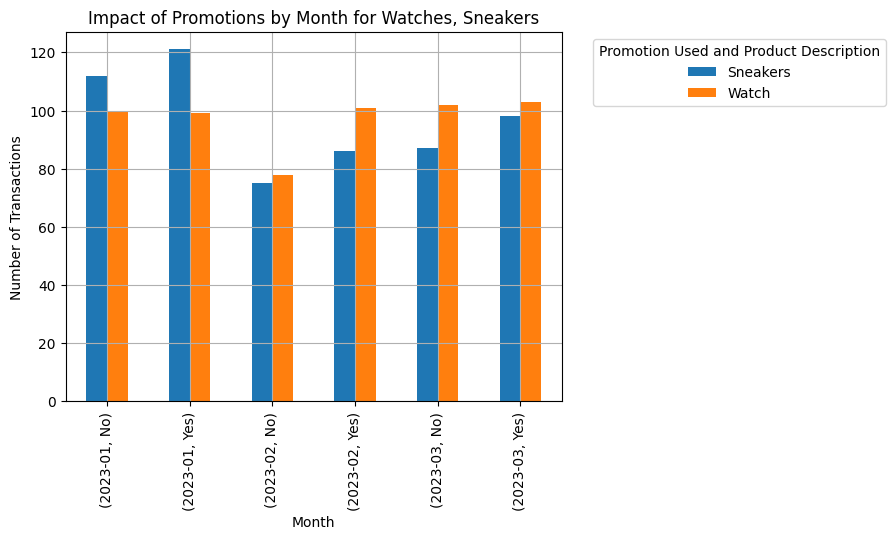

In [82]:
# Group by month and promotion status for specific products
monthly_specific_product_promotions = specific_product_data.groupby([specific_product_data['Transaction Date'].dt.to_period('M'), 'Promotion Used', 'Product Description']).size().unstack()

# Plot the impact of promotions by month for specific products
plt.figure(figsize=(12, 6))
monthly_specific_product_promotions.plot(kind='bar')
plt.title('Impact of Promotions by Month for Watches, Sneakers')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.legend(title='Promotion Used and Product Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 1200x600 with 0 Axes>

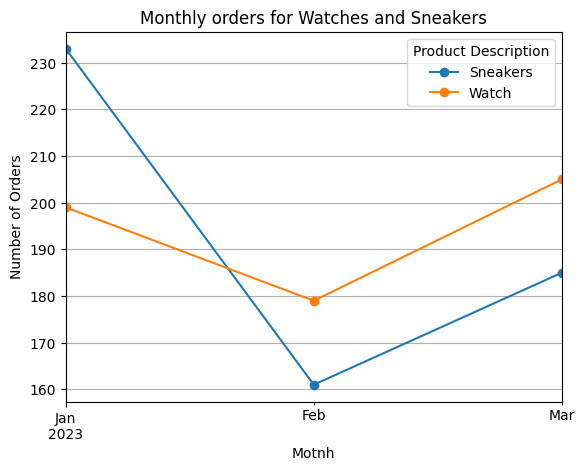

In [83]:
monthly_orders_specific_products = specific_product_data.groupby([specific_product_data['Transaction Date'].dt.to_period('M'), 'Product Description']).size().unstack()
plt.figure(figsize=(12,6))
monthly_orders_specific_products.plot(kind='line', marker='o')
plt.title('Monthly orders for Watches and Sneakers')
plt.xlabel('Motnh')
plt.ylabel('Number of Orders')
plt.legend(title='Product Description')
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13016\955361538.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_category_sales = data.groupby(['Age Group', 'Product Category']).size().unstack().fillna(0)


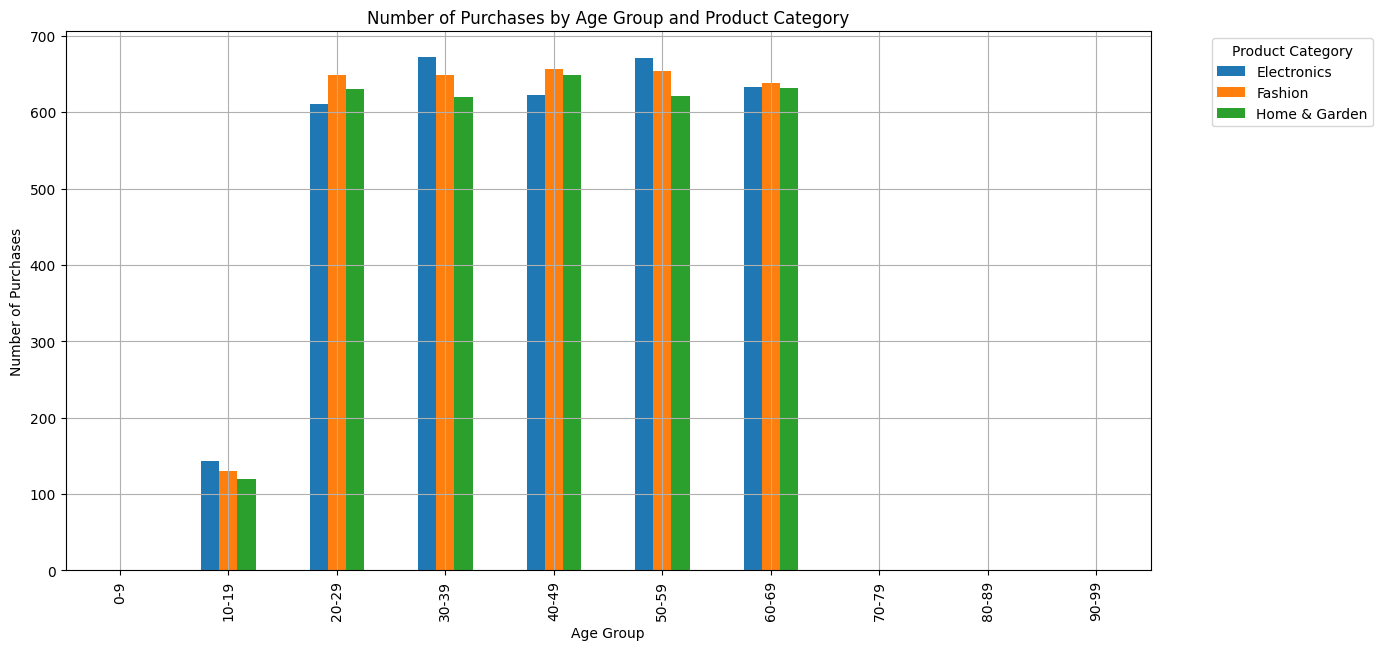

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'Transaction Date' column is in datetime format
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Create age groups in intervals of 10 years
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)

# Group by age group and product category, then count the number of purchases
age_group_category_sales = data.groupby(['Age Group', 'Product Category']).size().unstack().fillna(0)

# Plot the number of purchases by age group and product category
age_group_category_sales.plot(kind='bar',figsize=(14, 7))
plt.title('Number of Purchases by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       10000 non-null  int64         
 1   Customer ID          10000 non-null  int64         
 2   Product ID           10000 non-null  int64         
 3   Transaction Date     10000 non-null  datetime64[ns]
 4   Purchase Hour        10000 non-null  int64         
 5   Quantity             10000 non-null  int64         
 6   Price                10000 non-null  float64       
 7   Discounts            10000 non-null  float64       
 8   Payment Method       10000 non-null  object        
 9   Product Category     10000 non-null  object        
 10  Customer Age         10000 non-null  int64         
 11  Customer Gender      10000 non-null  object        
 12  Customer Location    10000 non-null  object        
 13  Salesperson ID       10000 non-n

C:\Users\User\AppData\Local\Temp\ipykernel_13016\4281129944.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_specific_product_sales = specific_product_data.groupby(['Age Group', 'Product Description']).size().unstack().fillna(0)


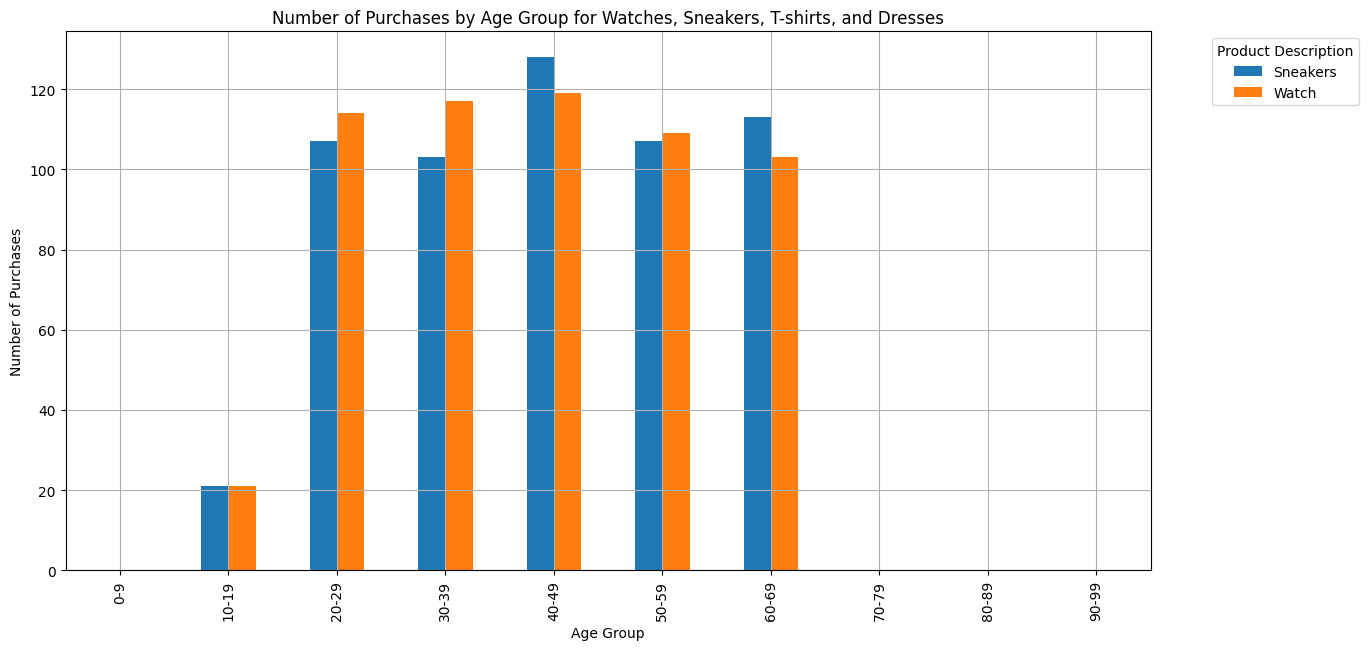

In [87]:
age_group_specific_product_sales = specific_product_data.groupby(['Age Group', 'Product Description']).size().unstack().fillna(0)

age_group_specific_product_sales.plot(kind='bar', figsize=(14, 7))
plt.title('Number of Purchases by Age Group for Watches, Sneakers, T-shirts, and Dresses')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.legend(title='Product Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [89]:
# Conclusion

# Drop in Sales in February was due to less orders on certain items like (Watches,Sneakers) in Fashion Category, as we dropped their discounts in that particular month.
# No other major reason found.